In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading test output from the model and converting to time index

filename = r'Brunei_Champion_GT5_tst_pred_01Dec2018_01Jul2019.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv(filename, parse_dates=['timestamp'], date_parser = dateparse)
df.set_index('timestamp', inplace = True)
df['date'] = df.index

In [4]:
# Changing -1 to 1 and 1 to 0 [1 denotes anomaly, 0 denotes normal]

df['anomaly'] = df['prediction']
df.anomaly = df.anomaly.replace(1, 0)
df.anomaly = df.anomaly.replace(-1, 1)
df['sys_status'] = 0
df.loc[df['system_status'] == 'online','sys_status'] = 1
df.loc[df['system_status'] == 'offline','sys_status'] = 0
df['gen_alert'] = 0
df.loc[(df['system_status'] == 'online') & (df['alert'] == 1),'gen_alert'] = 1


In [5]:
# Creating results dataframe

resultsdf = df[['anomaly','sys_status','alert','gen_alert']].resample('W').sum()
resultsdf.columns = ['anomaly_count','online_status_count','flips_count','gen_alert_count']
x = df[['anomaly','sys_status']].resample('W').count()
resultsdf['TotalCounts'] = x['anomaly']
resultsdf['anomaly_ratio'] = resultsdf['anomaly_count'] / resultsdf['online_status_count']
resultsdf['flips_ratio'] = resultsdf['flips_count'] / resultsdf['online_status_count']
resultsdf['gen_alert_ratio'] = resultsdf['gen_alert_count'] / resultsdf['online_status_count']
resultsdf = resultsdf[resultsdf['TotalCounts'] > 200]


In [6]:
len(resultsdf) #datapoints  

30

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


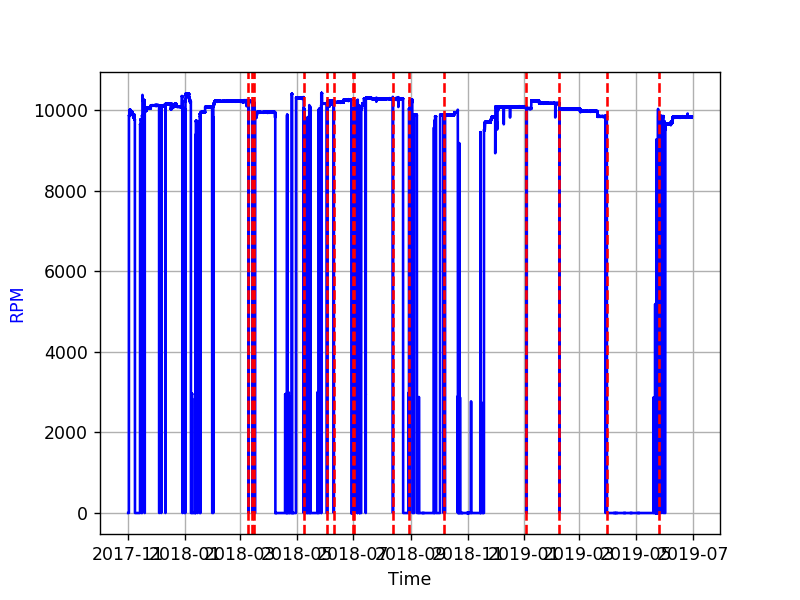

In [8]:
# Plotting entire dataset

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
pdf = pd.read_csv(r'GT5_tags_masterdata.csv', parse_dates = ['timestamp'], date_parser = dateparse)
pdf.set_index('timestamp', inplace = True)

# Loading the Failure file 

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dffailure = pd.read_excel(r'GT5-downtime.xlsx', parse_dates = ['Trip Start Date'], date_parser = dateparse)
pdf = pdf[pdf.index <= resultsdf.index[-1]]

fig, ax1 = plt.subplots()

ax1.plot(pdf['CPCX07-DCS-GT5_XZA5754_NEW'], 'b-', label = 'RPM')
ax1.set_xlabel('Time')
ax1.set_ylabel('RPM', color = 'b')
ax1.grid(True)
for cnt in range(len(dffailure)):
    ax1.axvline(x = dffailure.loc[dffailure.index[cnt],'Trip Start Date'], color = 'r', linestyle = '--')
plt.show()


In [9]:
# Reloading the failure dataframe
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dffailure = pd.read_excel(r'GT5-downtime.xlsx',parse_dates = ['Trip Start Date'], date_parser = dateparse)
dffailure = dffailure[dffailure['Trip Start Date'] >= resultsdf.index[0]]
dffailure = dffailure[dffailure['Trip Start Date'] <= resultsdf.index[-1]]


<IPython.core.display.Javascript object>


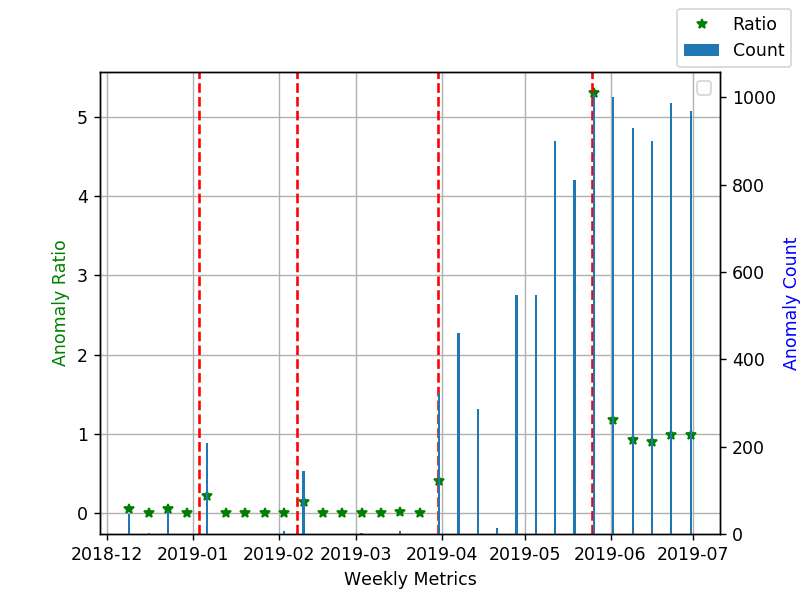

In [10]:
# Create anomaly ratio plot

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
ax1.plot(resultsdf['anomaly_ratio'], 'g*', label = 'Ratio')
ax2.bar(resultsdf.index,resultsdf['anomaly_count'], label = 'Count')
ax1.set_xlabel('Weekly Metrics')
ax1.set_ylabel('Anomaly Ratio', color = 'g')
ax2.set_ylabel('Anomaly Count', color = 'b')
ax1.grid(True)
#ax2.grid('off')
fig.legend()
ax1.legend('Ratio','Count')
for cnt in range(len(dffailure)):
    ax1.axvline(x = dffailure.loc[dffailure.index[cnt],'Trip Start Date'], color = 'r', linestyle = '--')


plt.show()


<IPython.core.display.Javascript object>


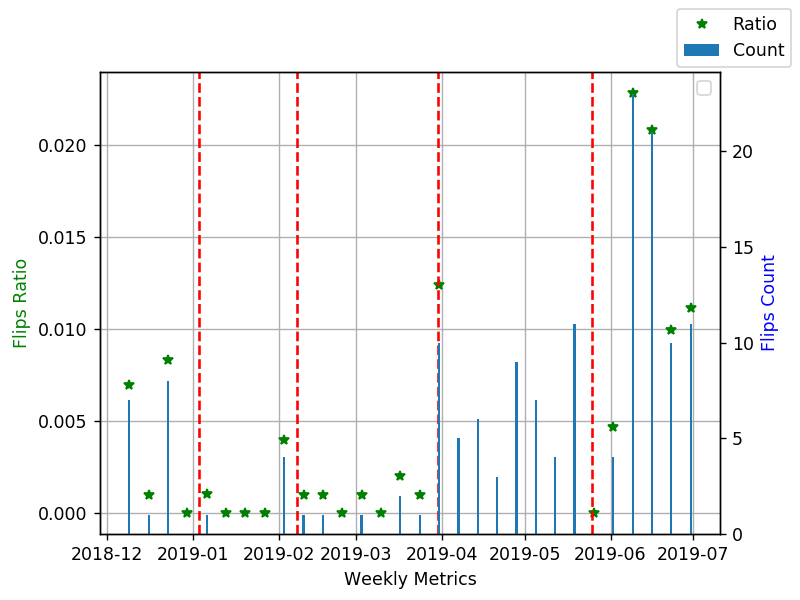

In [11]:
# Create flips ratio plot

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(resultsdf['flips_ratio'], 'g*', label = 'Ratio')
ax2.bar(resultsdf.index,resultsdf['flips_count'], label = 'Count')

ax1.set_xlabel('Weekly Metrics')
ax1.set_ylabel('Flips Ratio', color = 'g')
ax2.set_ylabel('Flips Count', color = 'b')
ax1.grid(True)
#ax2.grid('off')
fig.legend()
ax1.legend('Ratio','Count')
for cnt in range(len(dffailure)):
    ax1.axvline(x = dffailure.loc[dffailure.index[cnt],'Trip Start Date'], color = 'r', linestyle = '--')


plt.show()

<IPython.core.display.Javascript object>


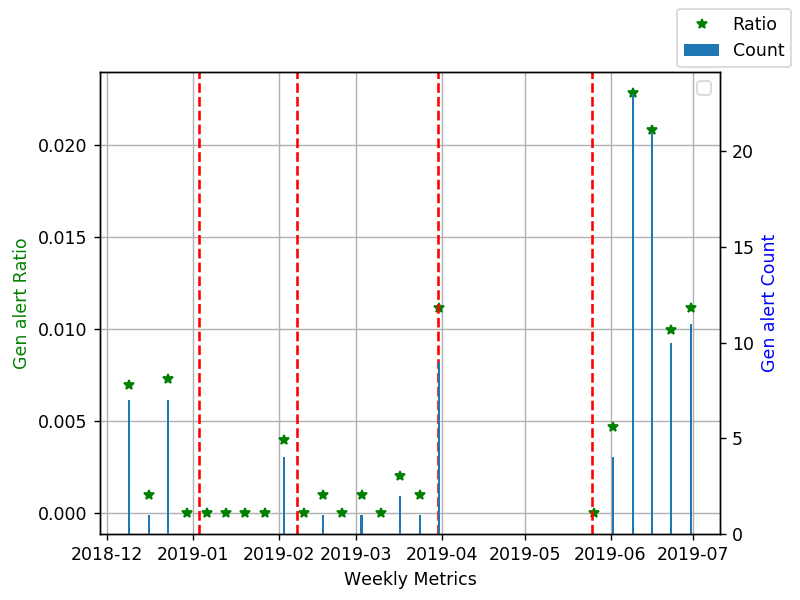

In [12]:
# Create alert plot

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(resultsdf['gen_alert_ratio'], 'g*', label = 'Ratio')
ax2.bar(resultsdf.index,resultsdf['gen_alert_count'], label = 'Count')

ax1.set_xlabel('Weekly Metrics')
ax1.set_ylabel('Gen alert Ratio', color = 'g')
ax2.set_ylabel('Gen alert Count', color = 'b')
ax1.grid(True)
#ax2.grid('off')
fig.legend()
ax1.legend('Ratio','Count')
for cnt in range(len(dffailure)):
    ax1.axvline(x = dffailure.loc[dffailure.index[cnt],'Trip Start Date'], color = 'r', linestyle = '--')

plt.show()

In [1]:
#resultsdf

In [ ]:
#df[['anomaly','sys_status','alert','gen_alert']].resample('M').sum()